# Homework 6 Part 1

## Question 1: 

Today we will be implementing PCA (principal-component analysis) from scratch by generating the covariance matrix and using SVD.  The idea is to implement this directly, from scratch, in Python. Not to use higher-level functions from numpy or scikit-learn.

Use the below dataset for your analysis. 

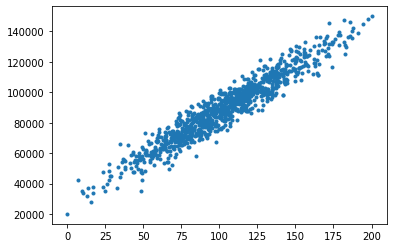

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

x, y, coef = datasets.make_regression(n_samples=1000,# number of samples
                                      n_features=1,# number of features
                                      n_informative=10,# number of useful features 
                                      noise=25,# bias and standard deviation of the guassian noise
                                      coef=True,# true coefficient used to generated the data
                                      random_state=0) # set for same data points for each run

# Scale feature x (years of experience) to range 0..200
x = np.interp(x, (x.min(), x.max()), (0, 200))

# Scale target y (salary) to range 20000..150000 
y = np.interp(y, (y.min(), y.max()), (20000, 150000))

# plt.ion() #interactive plot on

plt.plot(x,y,'.')

In [ ]:
# Your dataset
data = np.array(list(zip(x,y)), dtype=float)

In [ ]:
# Center and scale data
data_norm = (data - np.mean(data,axis=0))/np.std(data,axis=0)

a.  For the above dataset, implement PCA using both the covariance matrix and using singular-value decomposition.  

Remember, when you calculate the covariance matrix, you should use only basic Python code. Do not just call the numpy or sklearn function (though you can of course compare the results of your code to that of those functions to make sure your code works properly).

Now, calculate the covariance matrix for the data

In [ ]:
cov=1/(data_norm.shape[0]-1)*(np.dot(data_norm.T,data_norm))
cov

array([[1.001001  , 0.95710762],
       [0.95710762, 1.001001  ]])

Using numpy, determine the eigenvectors and eigenvalues.     

Remember: Let $\overleftrightarrow{a}$ be a square matrix, $\vec ν$ a vector, and $λ$ a scalar that satisfy $\overleftrightarrow{a} \vec{ν} = λ\vec{ν}$. Then $λ$ is then called the eigenvalue associated with eigenvector $\vec ν$ of $\overleftrightarrow{a}$.

The eigenvalues of $\overleftrightarrow{a}$ are also the roots of the characteristic equation 
$$det\left( \overleftrightarrow{a} - \lambda \overleftrightarrow{I}\right) = 0,$$ 
where $det\left( \right)$ is the determinant of a square matrix and $\overleftrightarrow{I}$ is the identity matrix.


In [ ]:
from numpy import linalg as LA
w, v = LA.eig(cov)
print("Eigenvectors:\n", v)
print("Eigenvalues:\n", w)

Eigenvectors:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Eigenvalues:
 [1.95810862 0.04389338]


When you are done, plot the eigenvectors onto the data above (the cloud of points), as lines. Plot the first one in red and the second one in green. Then copy the resulting figure into Answer 1a in your group's place in the table of the google doc for this week's in-class activity together with the two corresponding eigenvalues. 

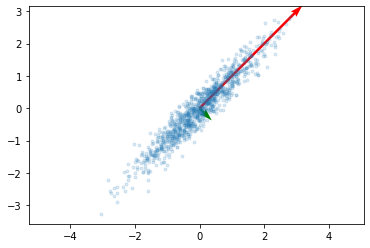

In [ ]:
plt.plot(data_norm[:,0],data_norm[:,1],'.',alpha=.15)
pos_1 = [np.mean(data_norm[:,0]),np.mean(data_norm[:,0])]
pos_2 = [np.mean(data_norm[:,1]),np.mean(data_norm[:,1])]
position = np.array([pos_1,pos_2])
r=w[0]/w[1]
scale = np.array([r/2.3,2.3])
plt.axis('equal')
plt.quiver(*position,v[:,0],v[:,1],color=['g','r'],scale=scale)

Now compute the PCA using SVD (here you may use the numpy function) following the instructions above. Then compare your results to those you got from the covariance matrix above.


In [ ]:
u, s, vh = np.linalg.svd(data_norm.T)
print("U:\n", u)
print("S:\n", s)

U:
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
S:
 [44.22839034  6.62189462]


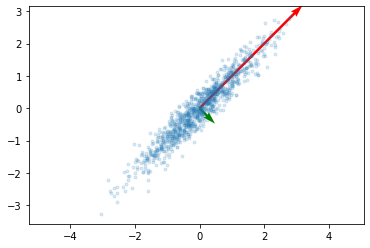

In [ ]:
plt.plot(data_norm[:,0],data_norm[:,1],'.',alpha=.15)
pos_1 = [np.mean(data_norm[:,0]),np.mean(data_norm[:,0])]
pos_2 = [np.mean(data_norm[:,1]),np.mean(data_norm[:,1])]
position = np.array([pos_1,pos_2])
r=s[1]/s[0]
scale = np.array([2.3,2.3/r])
plt.axis('equal')
plt.quiver(*position,-u[:,0],-u[:,1],color=['r','g'],scale=scale)

The results from both methods produced the same principle component vectors. 

b. Can you think of the advantages and disadvantages of the two method? Discuss it in the table of the google doc (question 1b). 

Pros: 
* Removes correlated features
* Improves algorithm performance
* Reduces overfitting
* Improves visualization

Cons: 
* Becomes less interpretable
* Information loss

 ## Question 2:
 You have a cloud of points for which $y ⃗=β_0+β_1 x ⃗+ε ⃗$   for $y ⃗,x ⃗,ε ⃗∈R^n$ (as in the figure above). We learned in class how to run a regression line through the data. We also now learned that, if we concatenate $x ⃗$ and $y ⃗$, we could treat it as a dataset, run PCA through it, and find the first principal direction (i.e., the loadings of the first principal component) for the dataset. Ignoring the fact that the dataset may not be centered at the origin, would the direction of the 1st principal component would be the same or different from the regression line through the data? Write and explain your answer in Answer 2 in the google doc for this week's in-class activity. 

While the directions will be close, the 1st principle component will not be in the same direction as the regression line. The primary reason for this is because PCA is attempting to quantify a relationship between the two variables while regression attempts to predict one variable based on another. To do this, PCA will find the line that minimizes the error orthogonal to the regression line. Regression on the otherhand attempts to reduce the residuals in the direction of the dependent variable.